In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

/var/folders/wc/dg5vr0h57jvg48dksgcxz02w0000gn/T/ipykernel_51499/3454884829.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/processed/properties_cleaned_V2.csv")

In [3]:
df.head()

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,the lions cghs,flat,sector 56,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up...,4,4,3+,...,2400.0,2000.0,1800.0,0,1,0,0,1,2,92
1,bestech park view residency,flat,sector 2,0.98,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,...,1565.0,NaN,NaN,0,0,0,1,0,0,75
2,bptp freedom park life,flat,sector 57,5.50,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,...,NaN,5010.0,NaN,1,1,0,0,0,2,120
3,ss the leaf,flat,sector 85,1.25,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up...,2,2,3,...,1741.0,1730.0,1720.0,0,0,0,0,0,0,35
4,vatika city homes,flat,sector 83,1.05,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet a...,3,3,3,...,1740.0,NaN,1225.0,0,1,0,0,0,2,81


In [4]:
df.shape

(3803, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   society              3802 non-null   object 
 1   property_type        3803 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             1264 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1684 non-null   float64
 15  carpet_area          1944 non-null   f

In [6]:
df.duplicated().sum()

126

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(3677, 23)

SOCIETY COLUMN

In [8]:
df["society"].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
shyam apartment                           1
bptp park generations                     1
rk excelo                                 1
huda flats                                1
kibithu villas                            1
Name: count, Length: 675, dtype: int64

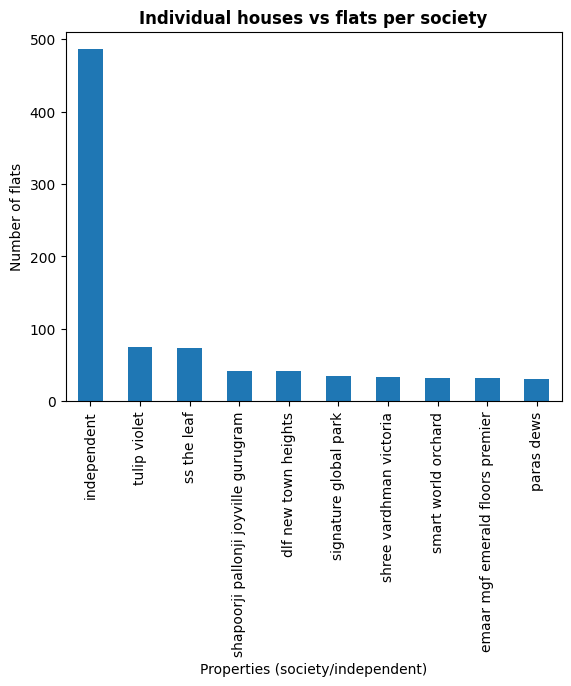

In [9]:
df["society"].value_counts().head(10).plot(kind="bar")
plt.xlabel("Properties (society/independent)")
plt.ylabel("Number of flats")
plt.title("Individual houses vs flats per society", fontweight="bold")
plt.xticks(rotation=90)
plt.show()


Every society consists of x number of flats. From the above graph we see that out of all the properties, 486 are indiviual houses which are not a part of any society. Remaining flats are a part of some or the other socierty.

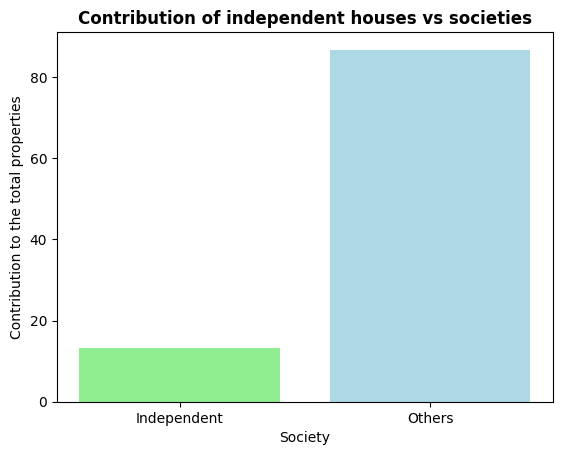

In [10]:
value_counts = df["society"].value_counts()

independent = value_counts.iloc[0]
others_sum = value_counts.sum() - value_counts.iloc[0]

independent_contribution = (independent / df.shape[0]) * 100
others_contribution = (others_sum / df.shape[0]) * 100

categories = ["Independent", "Others"]
percentages = [independent_contribution, others_contribution]

plt.bar(categories, percentages, color=["lightgreen", "lightblue"])
plt.xlabel("Society")
plt.ylabel("Contribution to the total properties")
plt.title("Contribution of independent houses vs societies", fontweight="bold")
plt.show()

The independent houses contribute around 15% to the total number of properties in Gurgaon.

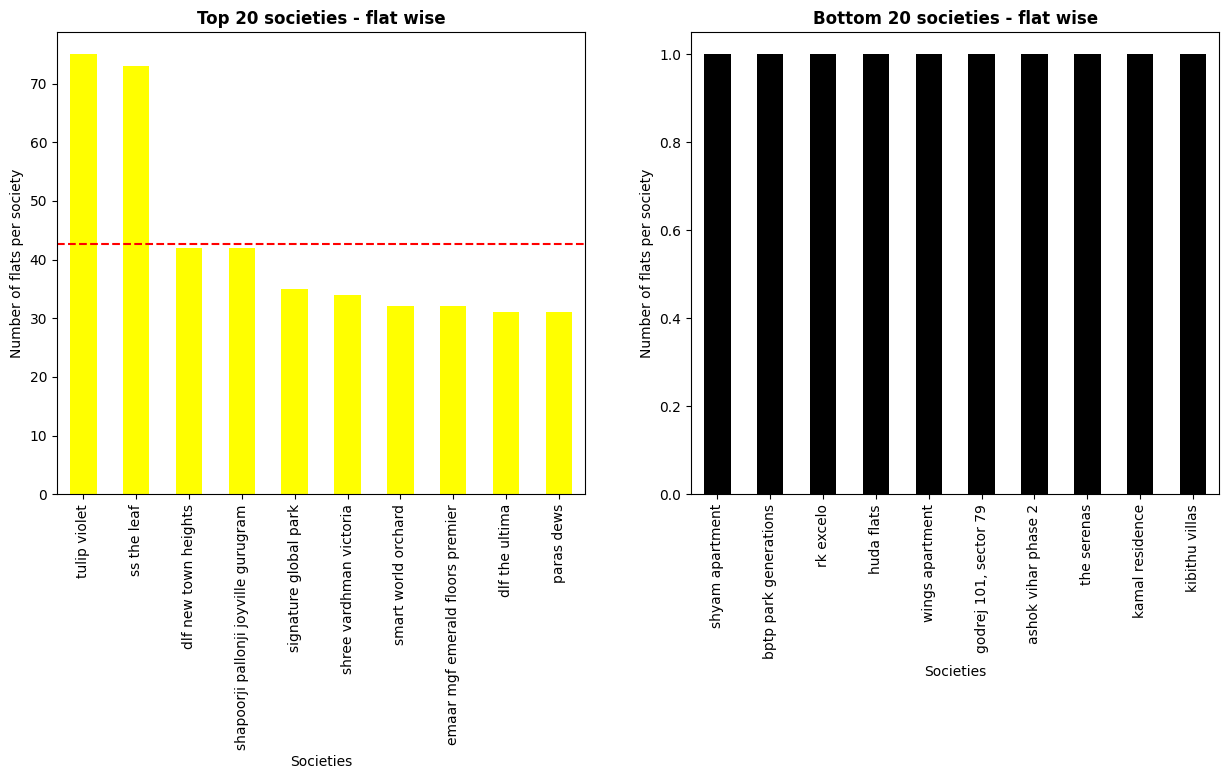

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0] = df[df["society"] != "independent"]["society"].value_counts().head(10).plot(kind="bar", color="yellow", ax=ax[0])
ax[0].set_xlabel("Societies")
ax[0].set_ylabel("Number of flats per society")
ax[0].set_title("Top 20 societies - flat wise", fontweight="bold")
ax[0].axhline(np.mean(np.mean(df[df["society"] != "independent"]["society"].value_counts().head(10))), color="red", linestyle="dashed", label="mean")

ax[1] = df[df["society"] != "independent"]["society"].value_counts().tail(10).plot(kind="bar", color="black", ax=ax[1])
ax[1].set_xlabel("Societies")
ax[1].set_ylabel("Number of flats per society")
ax[1].set_title("Bottom 20 societies - flat wise", fontweight="bold")

fig.show()


Average number of flats in the top tier of the societies is around 43 while on the other hand the majority of societies in the lower tier are capped to just 1 flat per society.

In [12]:
dictionary_society = {
    "Extremely dense":(df["society"].value_counts() > 100).sum(),
    "Dense":(df["society"].value_counts().between(50,100)).sum(),
    "Average (10-49)":(df["society"].value_counts().between(10,49)).sum(),
    "low (>10)": (df["society"].value_counts() < 10).sum()
}
dictionary_society

{'Extremely dense': 1, 'Dense': 2, 'Average (10-49)': 92, 'low (>10)': 580}

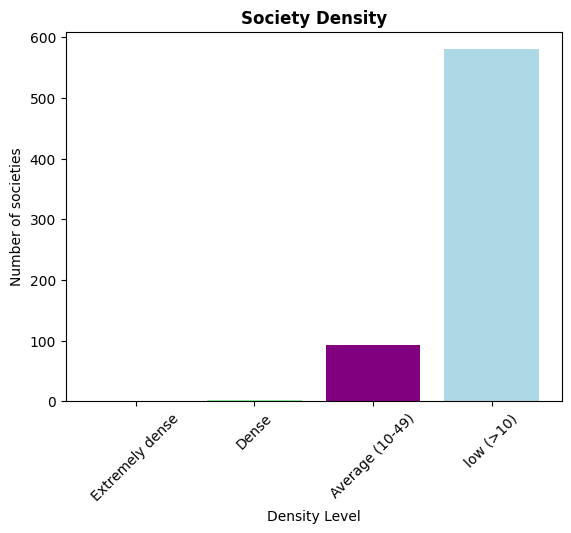

In [13]:
categories_society = list(dictionary_society.keys())
counts_society = list(dictionary_society.values())

plt.bar(categories_society, counts_society, color=['blue', 'lightgreen', 'purple', 'lightblue'])
plt.xlabel('Density Level')
plt.ylabel('Number of societies')
plt.title('Society Density', fontweight="bold")
plt.xticks(rotation=45)
plt.show()

Observations:-
1. There are total 675 societies.
2. Around 15% of properties lie under independent houses tag which dont belong to amy society.
3. There is only one society which is extremely densly populated with more than 100 flats (probably an outlier).
4. There are 2 societies with number of flats between 50-100.
5. 92 societies have flats between 10-50.
6. Majority of societies are on the lower side with number of flats below 10.

PROPERTY_TYPE COLUMN

In [14]:
df["property_type"].value_counts()

property_type
flat     2818
house     859
Name: count, dtype: int64

In [15]:
df["property_type"].value_counts().sum()

3677

<Axes: xlabel='property_type'>

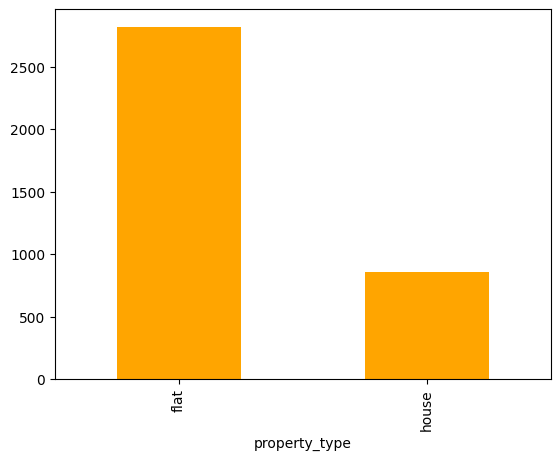

In [16]:
df["property_type"].value_counts().plot(kind="bar", color="orange")

Observations:-
1. Out of all the properties, 2819 are flats and 859 are houses.

In [17]:
df.iloc[:,2:].head(5)

,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,sector 56,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up...,4,4,3+,NaN,East,...,2400.0,2000.0,1800.0,0,1,0,0,1,2,92
1,sector 2,0.98,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,NaN,South-West,...,1565.0,NaN,NaN,0,0,0,1,0,0,75
2,sector 57,5.50,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,NaN,East,...,NaN,5010.0,NaN,1,1,0,0,0,2,120
3,sector 85,1.25,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up...,2,2,3,NaN,South-East,...,1741.0,1730.0,1720.0,0,0,0,0,0,0,35
4,sector 83,1.05,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet a...,3,3,3,NaN,South-East,...,1740.0,NaN,1225.0,0,1,0,0,0,2,81


SECTOR COLUMN

In [18]:
df["sector"].value_counts()

sector
sohna road    154
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 17a      3
sector 88b      3
sector 73       3
sector 27       3
sector 37       1
Name: count, Length: 113, dtype: int64

The sector column has high cardinality

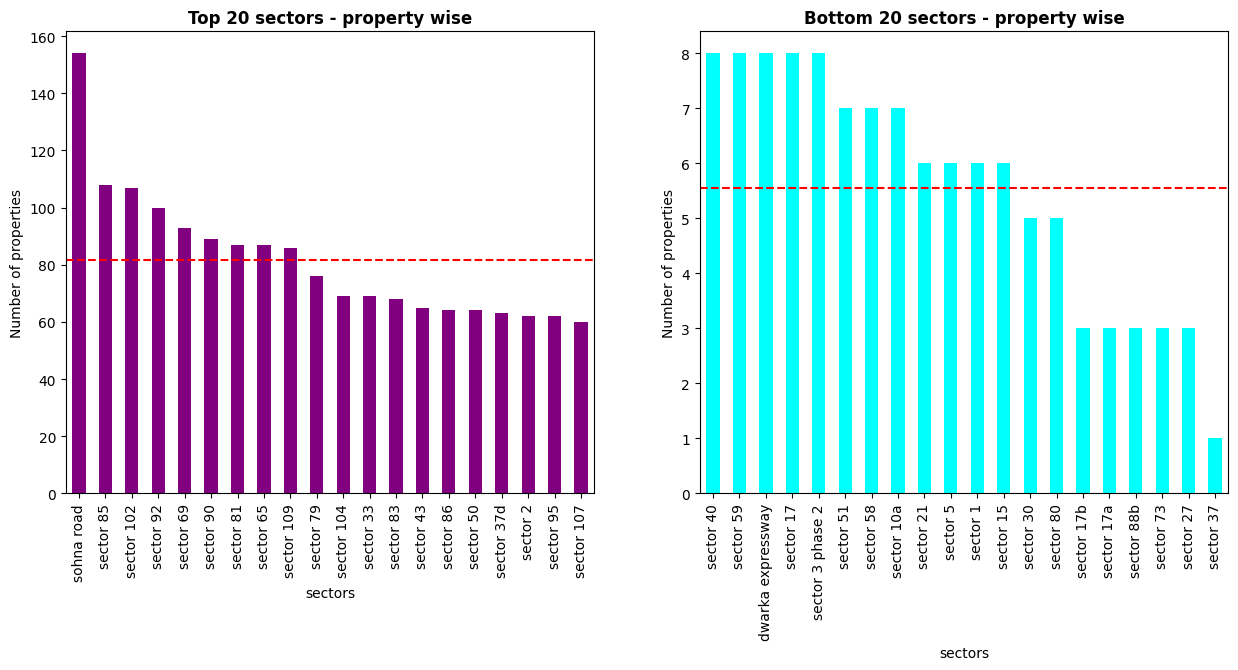

In [19]:
top = df["sector"].value_counts().head(20)
bottom = df["sector"].value_counts().tail(20)


fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0] = top.plot(kind="bar", ax=ax[0], color="purple")
ax[0].set_xlabel("sectors")
ax[0].set_ylabel("Number of properties")
ax[0].set_title("Top 20 sectors - property wise", fontweight="bold")
ax[0].axhline(np.mean(top), color="red", linestyle="dashed", label="mean")

ax[1] = bottom.plot(kind="bar", ax=ax[1], color="aqua")
ax[1].set_xlabel("sectors")
ax[1].set_ylabel("Number of properties")
ax[1].set_title("Bottom 20 sectors - property wise", fontweight="bold")
ax[1].axhline(np.mean(bottom), color="red", linestyle="dashed", label="mean")

fig.show()

On an average in the top tier, there are approximately 81 flats per sector and in th ebottom tier ther eare around 6 flats per sector.

In [20]:
dictionary_sector = {
    "Extremely dense":(df["sector"].value_counts() > 100).sum(),
    "Dense":(df["sector"].value_counts().between(50,100)).sum(),
    "Average (10-49)":(df["sector"].value_counts().between(10,49)).sum(),
    "low (>10)": (df["sector"].value_counts() < 10).sum()
}
dictionary_sector

{'Extremely dense': 3, 'Dense': 25, 'Average (10-49)': 63, 'low (>10)': 22}

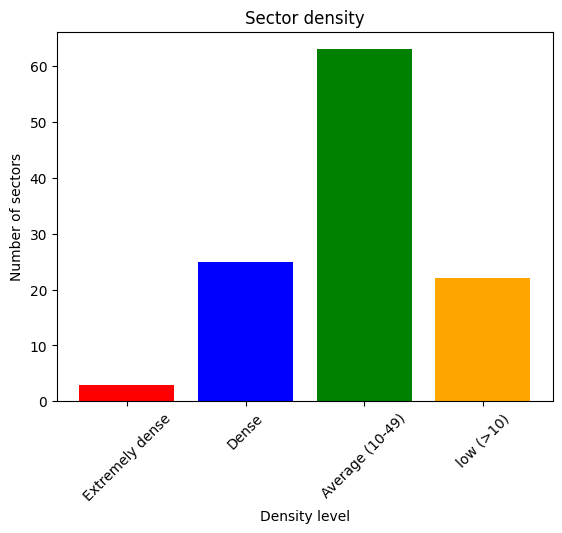

In [21]:
categories = list(dictionary_sector.keys())
counts = list(dictionary_sector.values())

plt.bar(categories, counts, color=['red', 'blue', 'green', 'orange'])
plt.xlabel('Density level')
plt.ylabel('Number of sectors')
plt.title('Sector density')
plt.xticks(rotation=45)
plt.show()


Observations:-
1. There are a total of 113 sectors.
2. In the top tier of sectors the average number of properties per sector is approximately 81.
3. In the lower sector the average number of properties per sector are approximately 6.
4. There are 3 extremely densly populated sectors with more than 100 properties.
5. 25 sectors have propertis between 50 - 100
6. The majority of sectors, 63 to be precise, have properties between 10 - 50.
7. Remaining 22 sectors lie in the lower tier with properties less than 10.  

In [22]:
df.iloc[:, 3:].head(5)

,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up...,4,4,3+,NaN,East,old property,2400.0,2000.0,1800.0,0,1,0,0,1,2,92
1,0.98,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,NaN,South-West,moderately new,1565.0,NaN,NaN,0,0,0,1,0,0,75
2,5.50,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,NaN,East,moderately new,NaN,5010.0,NaN,1,1,0,0,0,2,120
3,1.25,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up...,2,2,3,NaN,South-East,relatively new,1741.0,1730.0,1720.0,0,0,0,0,0,0,35
4,1.05,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet a...,3,3,3,NaN,South-East,moderately new,1740.0,NaN,1225.0,0,1,0,0,0,2,81


PRICE COLUMN

In [23]:
df["price"].isnull().sum()

17

In [24]:
df["price"].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

There is a lot of variance in the prices of the properties. The fact that the mean is higher than the median states that the data is right skewed. This means that there are outliers on the higher side. Which brings us to the max value which is 31.5 crores (the prices are in crores). This is definitely an outlier. The median tells that majority of the properties are centered around 1.5 crores.

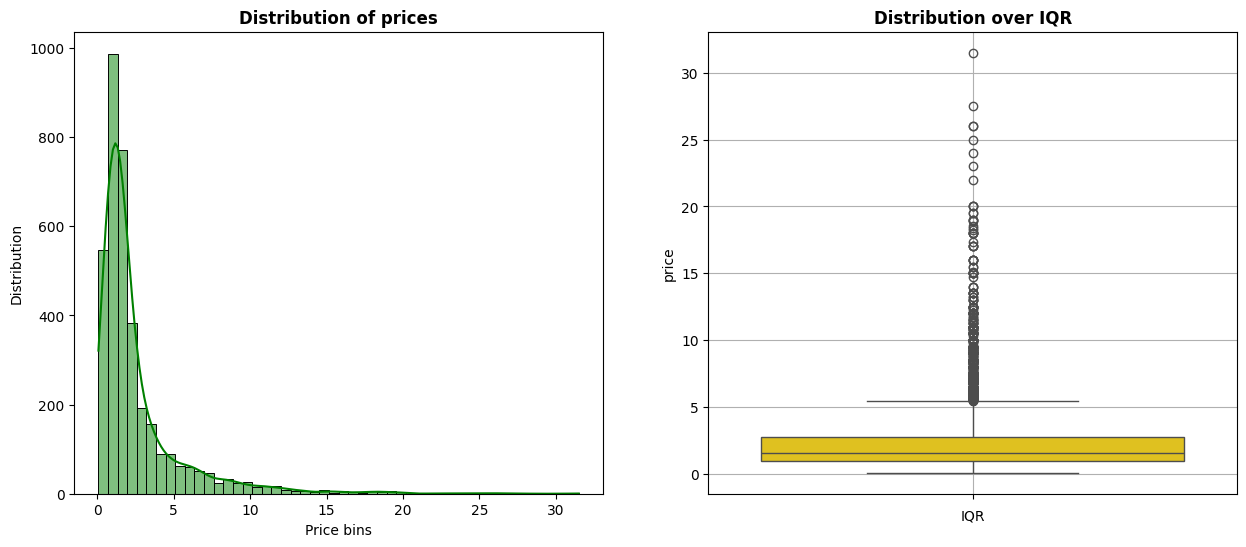

In [25]:
# LETS PLOT AND CHECK THE DISTRIBUTION AND THE OUTLIERS.

fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.histplot(df["price"], kde=True, bins=50, ax=ax[0], color="green")
ax[0].set_xlabel("Price bins")
ax[0].set_ylabel("Distribution")
ax[0].set_title("Distribution of prices", fontweight="bold")

sns.boxplot(df["price"], fill=True, ax=ax[1], color="gold")
ax[1].set_xlabel("IQR")
ax[1].set_title("Distribution over IQR", fontweight="bold")
ax[1].grid()

fig.show()

In [26]:
# LEST CHECK THE SKEWNESS AND KURTOSIS
skewness = df["price"].skew()
kurtosis = df["price"].kurtosis()

print(f"Skewness = {round(skewness, 2)}")
print(f"Kurtosis = {round(kurtosis, 2)}")

Skewness = 3.28
Kurtosis = 14.93


The prices are clearly right skewed as the skewness is 3.28 which is positive and it aligns with our histogram. 
The kurtosis is on a higher side and the peak is also sharp which indicates a heavier tail which mean we have extreme higher values/outliers in the column. 

In [27]:
# LETS CALCULATE THE IQR AND I DENTIFY THE OUTLIERS
# count    3660.000000
# mean        2.533664
# std         2.980623
# min         0.070000
# 25%         0.950000
# 50%         1.520000
# 75%         2.750000
# max        31.500000

Q1 = 0.95
Q3 = 2.75

IQR = Q3 - Q1
print(f"{IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound is {round(lower_bound, 2)}")
print(f"Upper bound is {upper_bound}")

1.8
Lower bound is -1.75
Upper bound is 5.45


In [28]:
# OUTLIER DETECTION

outlier = df[(df["price"] > upper_bound) | (df["price"] < lower_bound)]
outlier["price"].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

There are total 425 properties which are outliers.
The outliers have a huge variance in their values as expected. The median tells that most outliers are centered at around 8 crores.

<Axes: xlabel='price'>

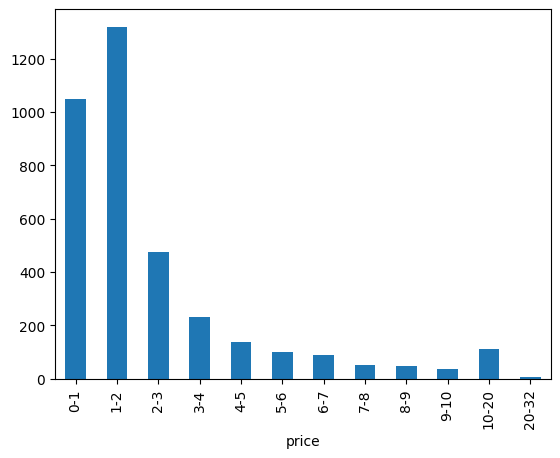

In [29]:
# LETS DIVIDE THE PRICES INTO DIFFERENT CATEGORY BINS 
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 32]
labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "10-20", "20-32"]

pd.cut(df["price"], bins=bins, labels=labels).value_counts().sort_index().plot(kind="bar")

Majority of the properties lie in the price range of 0 - 3 crores.

Lets apply logtransform and see if we get any better results for outliers by plotting the distribution and the boxplot.

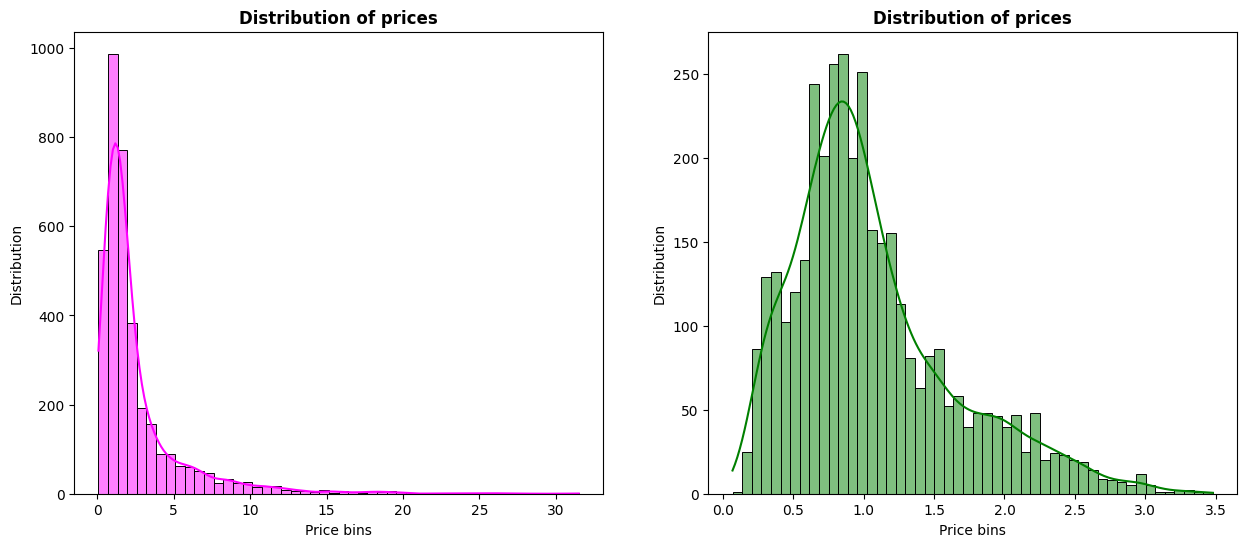

In [30]:
# DISTRIBUTION BEFORE AND AFTER LOG TRANSFORM
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.histplot(df["price"], kde=True, bins=50, ax=ax[0], color="magenta")
ax[0].set_xlabel("Price bins")
ax[0].set_ylabel("Distribution")
ax[0].set_title("Distribution of prices", fontweight="bold")

sns.histplot(np.log1p(df["price"]), kde=True, bins=50, ax=ax[1], color="green")
ax[1].set_xlabel("Price bins")
ax[1].set_ylabel("Distribution")
ax[1].set_title("Distribution of prices", fontweight="bold")

fig.show()

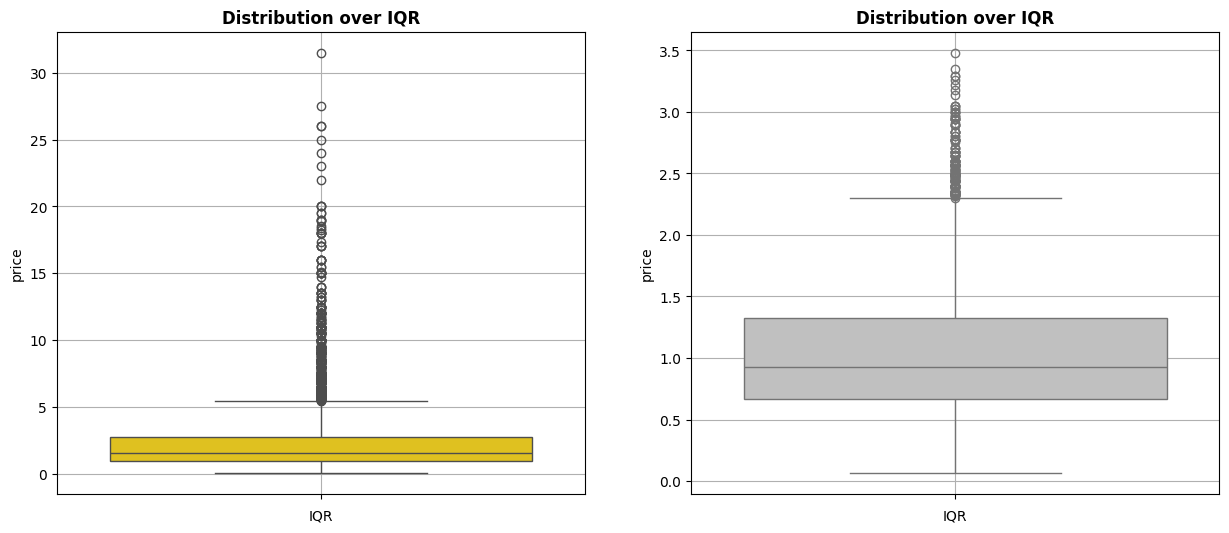

In [31]:
# BOXPLOT FOR BEFORE AND AFTER LOGF TRANSFORM
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(df["price"], fill=True, ax=ax[0], color="gold")
ax[0].set_xlabel("IQR")
ax[0].set_title("Distribution over IQR", fontweight="bold")
ax[0].grid()

sns.boxplot(np.log1p(df["price"]), fill=True, ax=ax[1], color="silver")
ax[1].set_xlabel("IQR")
ax[1].set_title("Distribution over IQR", fontweight="bold")
ax[1].grid()

fig.show()

In [32]:
# LEST CHECK THE SKEWNESS AND KURTOSIS
skewness_log = np.log1p(df["price"]).skew()
kurtosis_log = np.log(df["price"]).kurtosis()

print(f"Skewness after log transform = {round(skewness_log, 2)}")
print(f"Kurtosis after log transform = {round(kurtosis_log, 2)}")

Skewness after log transform = 1.07
Kurtosis after log transform = 0.05


Observations:-

1. Descriptive Statistics:

        Count: There are 3,660 non-missing price entries.
        Mean Price: The average price is approximately 2.53 crores.
        Median Price: The median (or 50th percentile) price is 1.52 crores.
        Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
        Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
        IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

2. Visualizations:

        Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
        Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

3. Missing Values: There are 17 missing values in the price column.

4. Skewness - It aligns with our visualisation that the data is right skewed.
5. Kurtosis - Its higher value suggests that data has extreme values for outliers.

6. Outliers Analysis (using IQR method):

        Based on the IQR method, there are 425 properties considered as outliers.
        These outliers have an average price of approximately 8 crores.
        The range for these outliers is from 5.46 crores to 31.5 crores.

The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
There's a significant drop in the number of properties priced above "5 crores."

Log1p helps addressing these outliers upto certain extend by handling all the values including 0 appropriately by bringing them down to a measurable scale.

In [33]:
df.iloc[:, 4:].head(5)

,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up...,4,4,3+,NaN,East,old property,2400.0,2000.0,1800.0,0,1,0,0,1,2,92
1,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,NaN,South-West,moderately new,1565.0,NaN,NaN,0,0,0,1,0,0,75
2,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,NaN,East,moderately new,NaN,5010.0,NaN,1,1,0,0,0,2,120
3,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up...,2,2,3,NaN,South-East,relatively new,1741.0,1730.0,1720.0,0,0,0,0,0,0,35
4,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet a...,3,3,3,NaN,South-East,moderately new,1740.0,NaN,1225.0,0,1,0,0,0,2,81


PRICE_PER_SQFT COLUMN

In [34]:
df["price_per_sqft"].isnull().sum()

17

In [35]:
df["price_per_sqft"].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

The variation in mean and median tells that we have outliers in this column and since the mean > median it points to the data being right skewed.
The price per square feet for properties is centered around 9020 rupees.
The maximum amount which is 6L per square feet here suggests that there is some data decripency as according to the domain knowlegde the price per square feet for a property can never be that high. 
Same goes with the minimum where price per square feet is 4 rupees, which is again impossible.

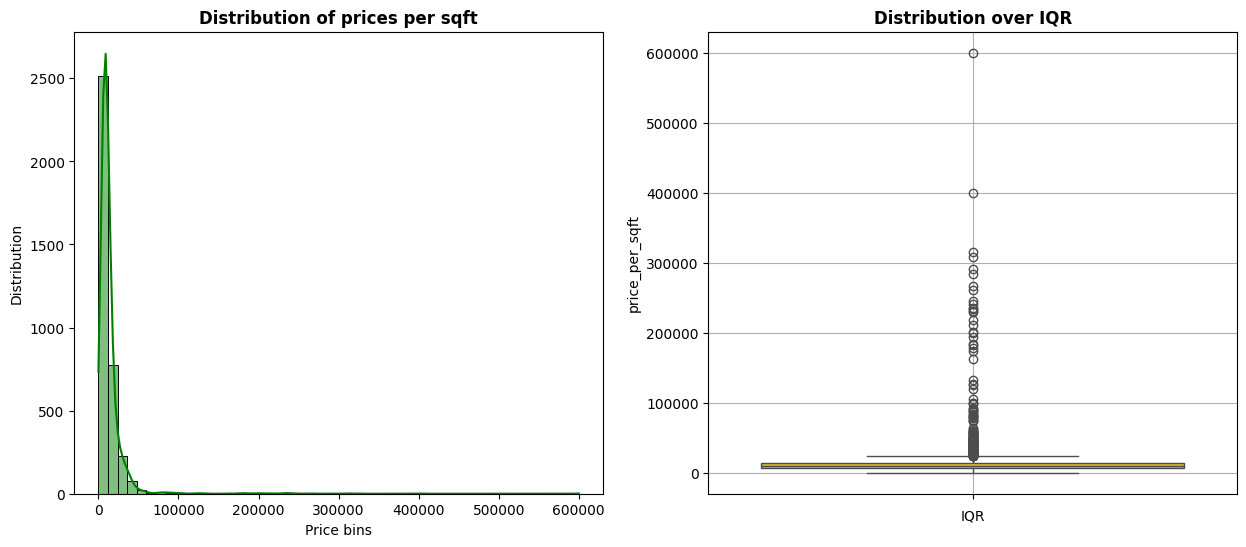

In [36]:
# LETS PLOT AND CHECK THE DISTRIBUTION AND THE OUTLIERS.

fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.histplot(df["price_per_sqft"], kde=True, bins=50, ax=ax[0], color="green")
ax[0].set_xlabel("Price bins")
ax[0].set_ylabel("Distribution")
ax[0].set_title("Distribution of prices per sqft", fontweight="bold")

sns.boxplot(df["price_per_sqft"], fill=True, ax=ax[1], color="gold")
ax[1].set_xlabel("IQR")
ax[1].set_title("Distribution over IQR", fontweight="bold")
ax[1].grid()

fig.show()

In [37]:
# LEST CHECK THE SKEWNESS AND KURTOSIS
skewness_price_per_sqft = df["price"].skew()
kurtosis_price_per_sqft = df["price"].kurtosis()

print(f"Skewness = {round(skewness_price_per_sqft, 2)}")
print(f"Kurtosis = {round(kurtosis_price_per_sqft, 2)}")

Skewness = 3.28
Kurtosis = 14.93


Observation:-
1. Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range,  with a few properties having exceptionally high price_per_sqft.

2. The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers.

3. There are total 17 missing values.

4. The prices are clearly right skewed as the skewness is 3.28 which is positive and it aligns with our histogram. 
5. The kurtosis is on a higher side and the peak is also sharp which indicates a heavier tail which mean we have extreme higher values/outliers in the column. 

In [38]:
df.iloc[:, 7:].head(3)

,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,4,4,3+,NaN,East,old property,2400.0,2000.0,1800.0,0,1,0,0,1,2,92
1,2,2,3,NaN,South-West,moderately new,1565.0,NaN,NaN,0,0,0,1,0,0,75
2,5,6,3+,NaN,East,moderately new,NaN,5010.0,NaN,1,1,0,0,0,2,120


ROOMS
1. BEDROOM
2. BATHROOM
3. BALCONY

In [39]:
df["bedRoom"].isnull().sum()

0

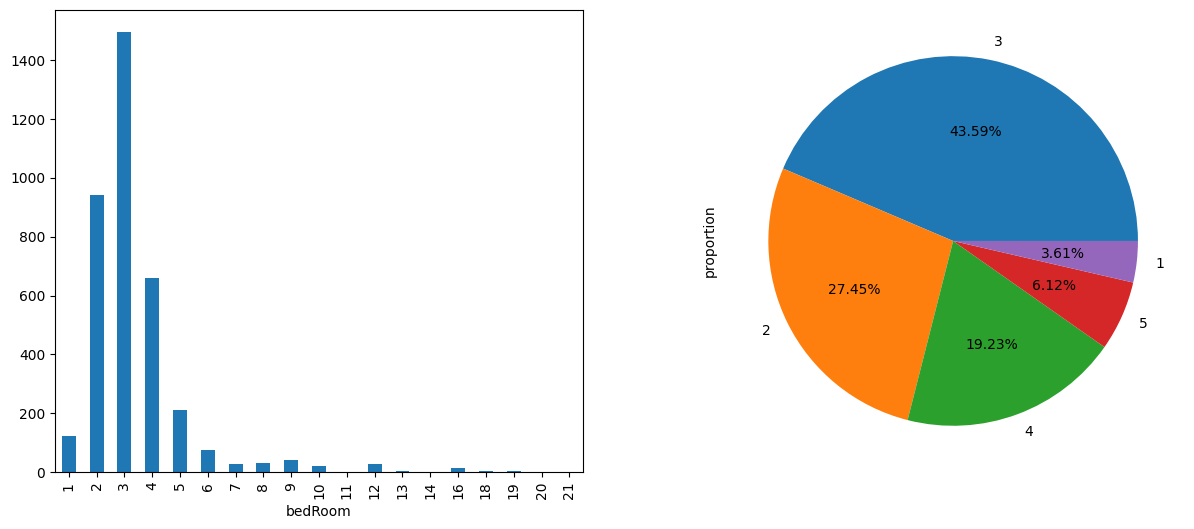

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0] = df["bedRoom"].value_counts().sort_index().plot(kind="bar", ax=ax[0])
ax[1] = df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')
fig.show()

BATHROOM COLUMN

In [41]:
df["bathroom"].isnull().sum()

0

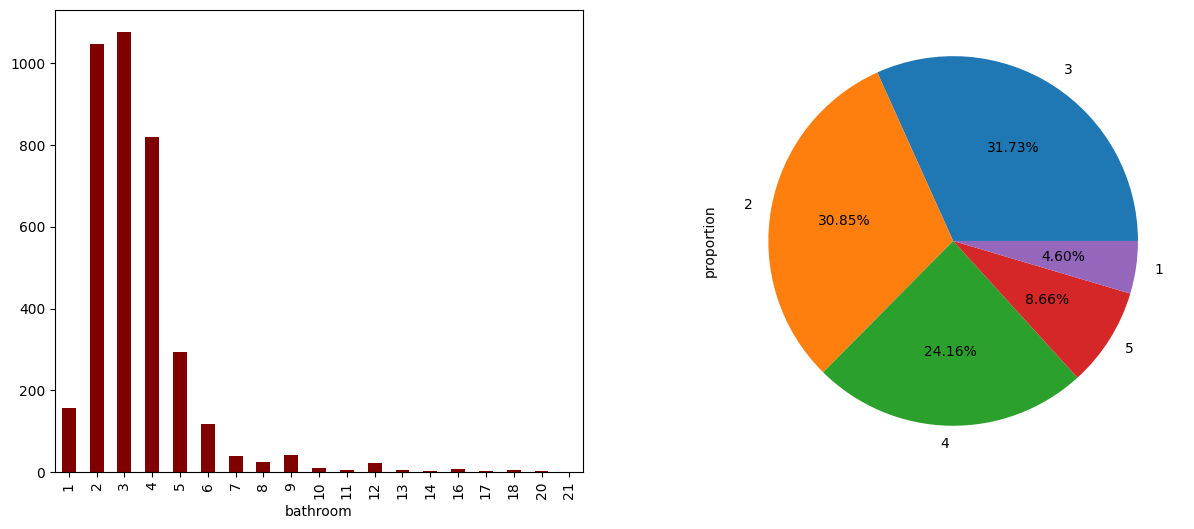

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0] = df["bathroom"].value_counts().sort_index().plot(kind="bar", ax=ax[0], color="maroon")
ax[1] = df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')
fig.show()

BALCONY COLUMN

In [43]:
df["balcony"].isnull().sum()

0

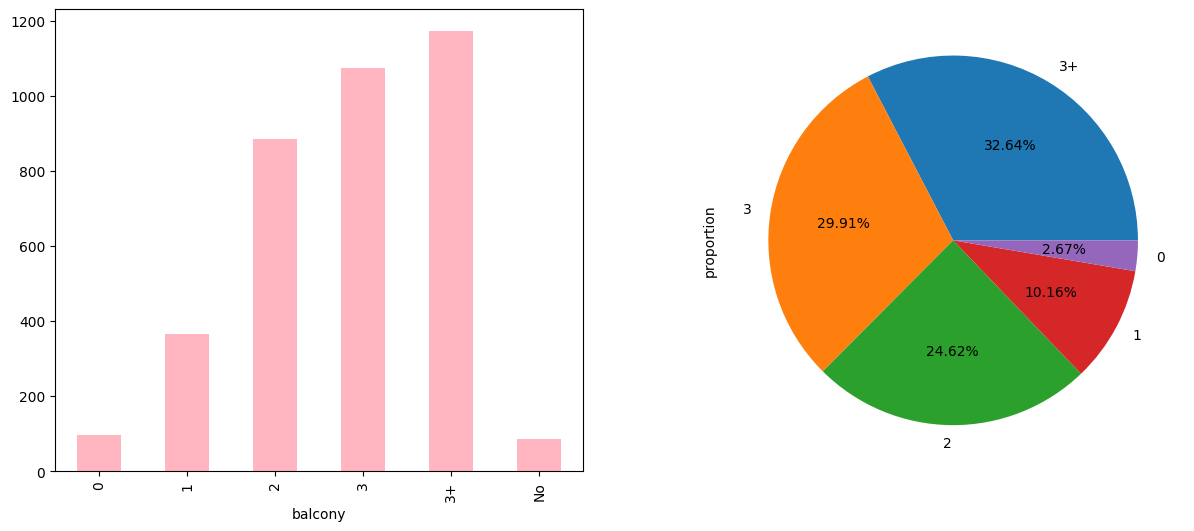

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0] = df["balcony"].value_counts().sort_index().plot(kind="bar", ax=ax[0], color="lightpink")
ax[1] = df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')
fig.show()

FLOOR NUM COLUMN

In [45]:
df["floorNum"].isnull().sum()

2431

In [46]:
df["floorNum"].describe()

count    1246.000000
mean        4.040128
std         4.426099
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        51.000000
Name: floorNum, dtype: float64

The mean is gretaer than median which suggests that there are possible outliers in the data and data is right skewed.
Minimum value of 0 means its the ground floor and maximum value of 51, which is an outlier mean there is some propert which has 51 floors.
Most properties are centered around 2 floors.

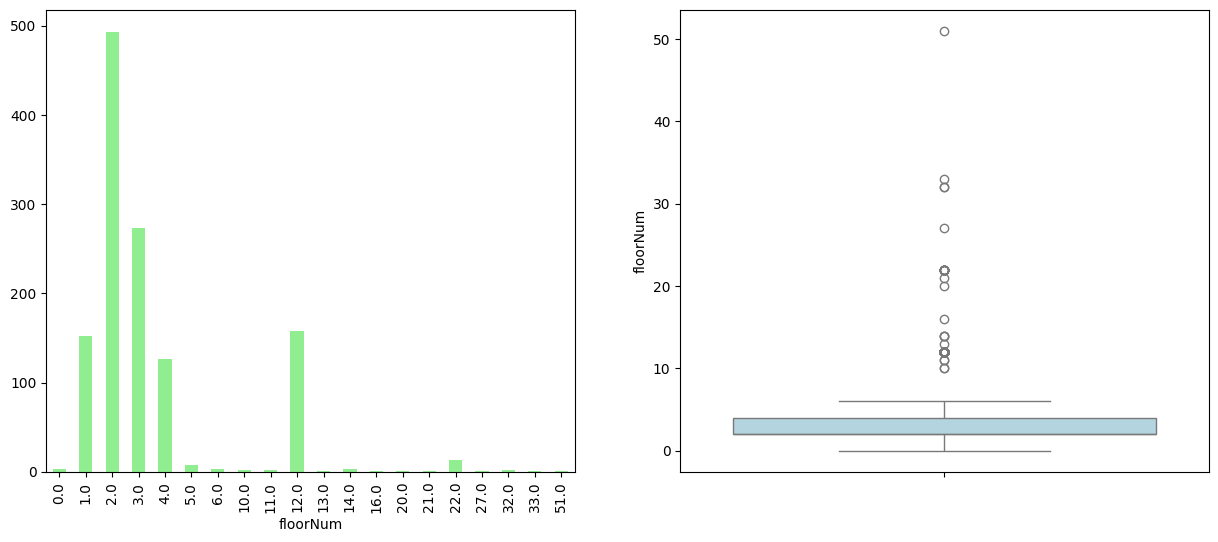

In [47]:
# LETS IDENTIFY NUMBER OF PROPERTIES IN EACH FLOOR CATEGORY AND ALSO LETS CHECK FOR OUTLIERS.
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0] = df["floorNum"].value_counts().sort_index().plot(kind="bar", ax=ax[0], color="lightgreen")
sns.boxplot(df["floorNum"], fill=True, color="lightblue", ax=ax[1])
fig.show()

Observation:-
1. The majority of the properties lie between the ground floor (0) and the 5th floor.
2. Floors 1 to 4 are particularly common, with the 2nd floor being the most frequent.
3. There are a few properties located at higher floors, but their frequency is much lower.
4. The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.

FACING COLUMN

In [48]:
df["facing"].isnull().sum()

1045

In [49]:
df["facing"].value_counts()

facing
East          623
North-East    623
North         387
West          249
South         231
North-West    193
South-East    173
South-West    153
Name: count, dtype: int64

AGE POSSESSION COLUMN

In [50]:
df["agePossession"].isnull().sum()

0

In [51]:
df["agePossession"].value_counts()

agePossession
relatively new        1646
new property           593
moderately new         563
Undefined              437
old property           303
under construction     134
undefined                1
Name: count, dtype: int64

AREAS
1. SUPER BUILTUP AREA
2. BUILTUP AREA
3. CARPET AREA

SUPER BUILT UP AREA

In [57]:
df.iloc[:, 13:].head(3)

,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,2400.0,2000.0,1800.0,0,1,0,0,1,2,92
1,1565.0,NaN,NaN,0,0,0,1,0,0,75
2,NaN,5010.0,NaN,1,1,0,0,0,2,120


In [58]:
df["super_built_up_area"].isnull().sum()

1802

In [59]:
df["super_built_up_area"].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

The mean > median tell us that the data is right skewed. Potential presence of outliers. 

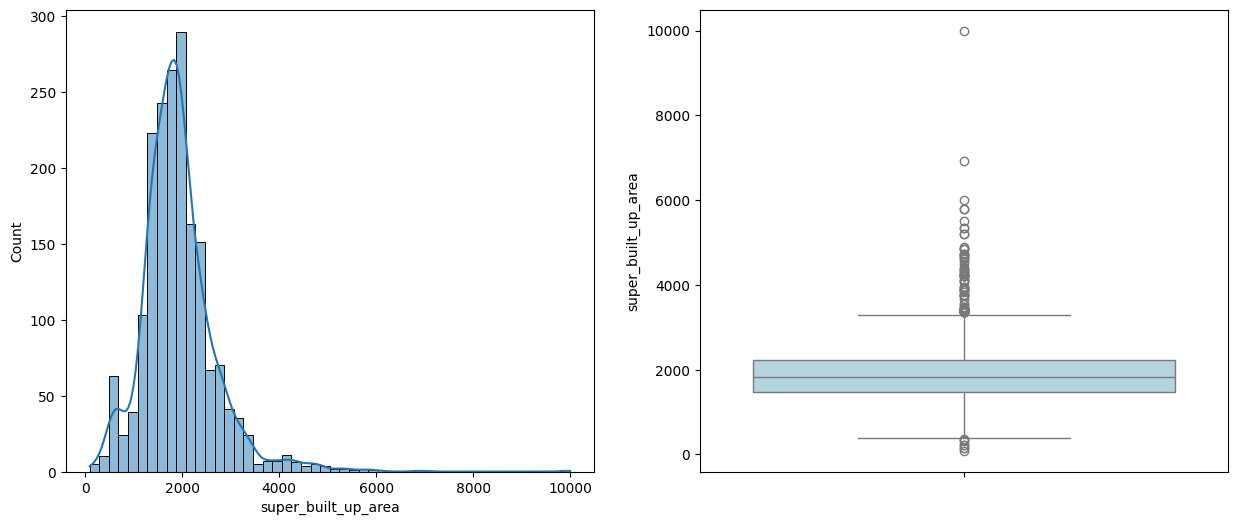

In [68]:
# LETS IDENTIFY THE DISTRIBUTION AND ALSO LETS CHECK FOR OUTLIERS.
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df["super_built_up_area"].dropna(), bins=50, kde=True, ax=ax[0])
sns.boxplot(df["super_built_up_area"].dropna(), fill=True, color="lightblue", ax=ax[1])
fig.show()

In [67]:
# LETS CHECK SKEWNESS AND KURTOSIS
skewness_super = df["super_built_up_area"].skew()
kurtosis_super = df["super_built_up_area"].kurtosis()

print(f"Skewness is {round(skewness_super, 2)}")
print(f"Kurtosis is {round(kurtosis_super, 2)}")

Skewness is 1.84
Kurtosis is 10.35


Observations:-
1. Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
2. There are a few properties with a significantly larger area, leading to a right-skewed distribution.
3. The interquartile range (IQR) lies between roughly 1,500 sq.ft and 2,200 sq.ft, indicating that the middle 50% of the properties fall within this range.
4. There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.
5. The skewness aligns with the distribution graph. It is slightly right skewed. However kurtosis is high which means there a a few outliers which have extreme values.

BUILTUP AREA

In [64]:
df["built_up_area"].isnull().sum()

2036

In [65]:
df["built_up_area"].describe()

count      1641.000000
mean       2394.330914
std       18203.807498
min          30.000000
25%        1125.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

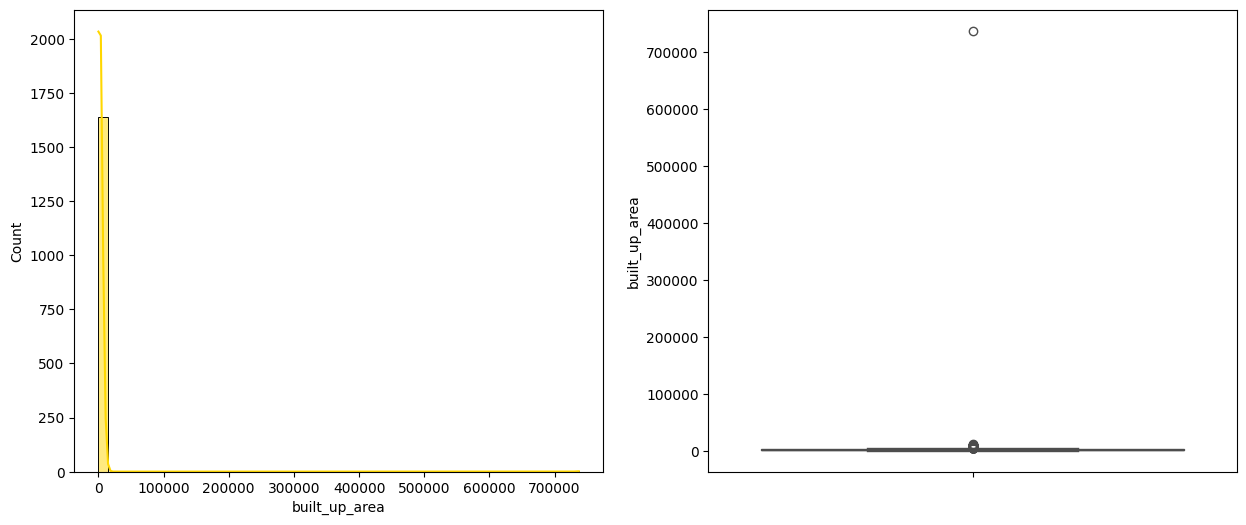

In [69]:
# LETS IDENTIFY THE DISTRIBUTION AND ALSO LETS CHECK FOR OUTLIERS.
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df["built_up_area"].dropna(), bins=50, kde=True, ax=ax[0], color="gold")
sns.boxplot(df["built_up_area"].dropna(), fill=True, color="orange", ax=ax[1])
fig.show()

In [70]:
# LETS CHECK SKEWNESS AND KURTOSIS
skewness_builtup = df["built_up_area"].skew()
kurtosis_builtup = df["built_up_area"].kurtosis()

print(f"Skewness is {round(skewness_builtup, 2)}")
print(f"Kurtosis is {round(kurtosis_builtup, 2)}")

Skewness is 40.14
Kurtosis is 1621.27


As mentioned above, the data is very highly right skewed and the kurtosis is way too high suggesting that there are many extreme outliers present in the data.

In [75]:
# CHECKING THE OUTLIER VALUES
# count      1641.000000
# mean       2394.330914
# std       18203.807498
# min          30.000000
# 25%        1125.000000
# 50%        1650.000000
# 75%        2400.000000
# max      737147.000000
Q1_builtup = 1125
Q3_builtup = 2400

IQR_builtup = Q3_builtup - Q1_builtup

lower_limit = Q1_builtup - 1.5 * IQR_builtup
upper_limit = Q3_builtup + 1.5 * IQR_builtup

In [77]:
outlier_builtup = df[(df["built_up_area"] > upper_limit) | (df["built_up_area"] < lower_limit)]
outlier_builtup["built_up_area"].describe()

count       120.000000
mean      11832.616667
std       66783.785821
min        4320.000000
25%        4538.250000
50%        5200.000000
75%        6392.500000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area'>

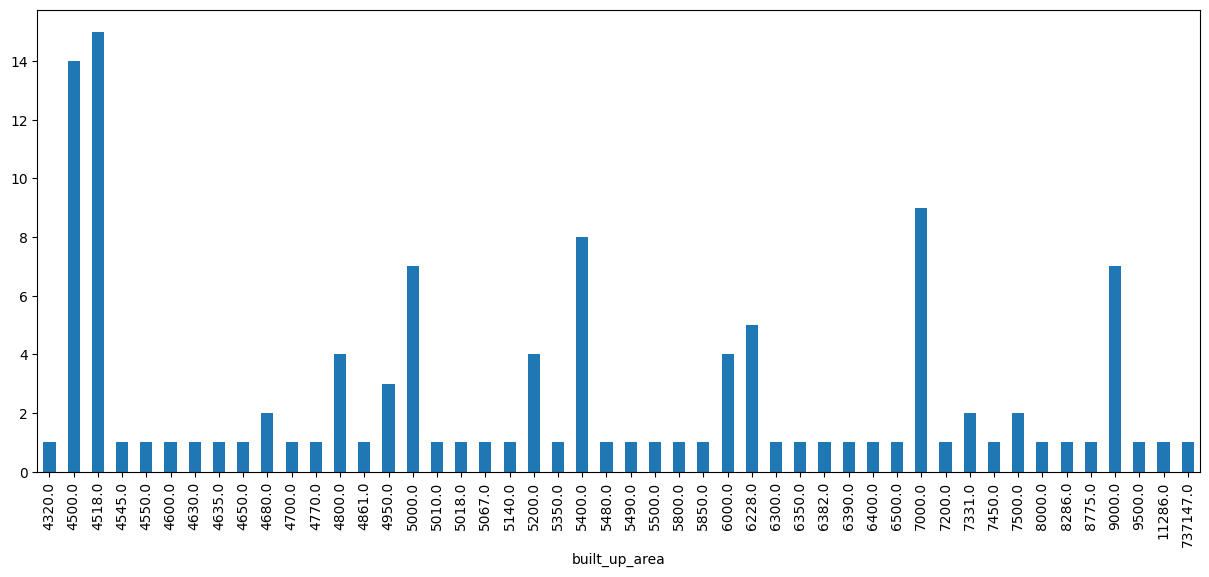

In [85]:
outlier_builtup["built_up_area"].value_counts().sort_index().plot(kind="bar", figsize=(15,6))

Observations:-
1. Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
2. There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
3. The box plot confirms the presence of significant outliers on the higher side.
4. There is a huge variation in the outliers. The majority of outliers lie in the range of 4500 - 5400 sqft. 
5. The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

CARPET AREA

In [71]:
df["carpet_area"].isnull().sum()

1805

In [72]:
df["carpet_area"].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

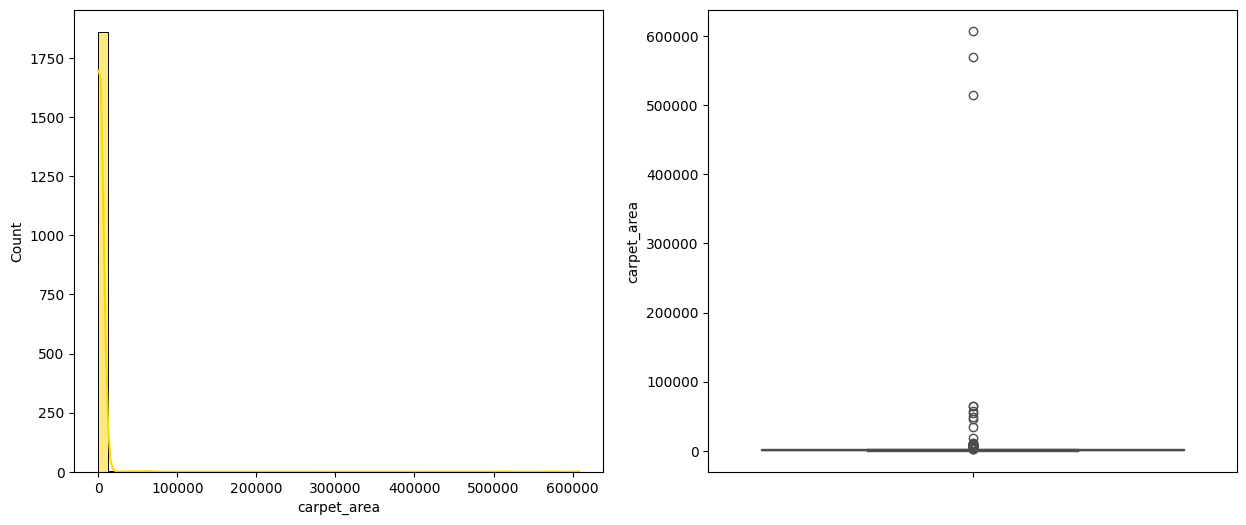

In [73]:
# LETS IDENTIFY THE DISTRIBUTION AND ALSO LETS CHECK FOR OUTLIERS.
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df["carpet_area"].dropna(), bins=50, kde=True, ax=ax[0], color="gold")
sns.boxplot(df["carpet_area"].dropna(), fill=True, color="orange", ax=ax[1])
fig.show()

In [74]:
# LETS CHECK SKEWNESS AND KURTOSIS
skewness_carpet = df["carpet_area"].skew()
kurtosis_carpet = df["carpet_area"].kurtosis()

print(f"Skewness is {round(skewness_carpet, 2)}")
print(f"Kurtosis is {round(kurtosis_carpet, 2)}")

Skewness is 24.33
Kurtosis is 604.54


Extremely high right skewed data with presence of extreme valued outliers.

In [81]:
# CHECKING THE OUTLIER VALUES
# count      1872.000000
# mean       2529.179507
# std       22799.836449
# min          15.000000
# 25%         843.000000
# 50%        1300.000000
# 75%        1790.000000
# max      607936.000000
Q1_carpet = 1125
Q3_carpet = 2400

IQR_carpet = Q3_carpet - Q1_carpet

lower_limit_carpet = Q1_carpet - 1.5 * IQR_carpet
upper_limit_carpet = Q3_carpet + 1.5 * IQR_carpet

In [83]:
outlier_carpet = df[(df["carpet_area"] > upper_limit_carpet) | (df["carpet_area"] < lower_limit_carpet)]
outlier_carpet["carpet_area"].describe()

count        42.000000
mean      54268.023810
std      144548.240377
min        4328.000000
25%        4960.000000
50%        6532.500000
75%       16341.500000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area'>

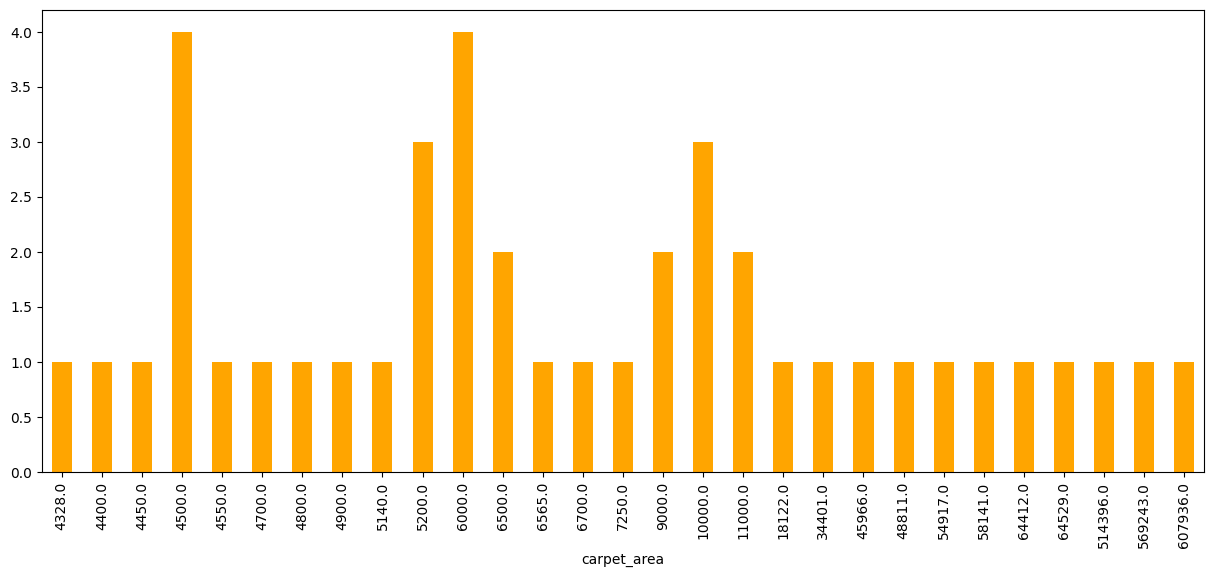

In [86]:
outlier_carpet["carpet_area"].value_counts().sort_index().plot(kind="bar", figsize=(15,6), color="orange")

ADDITIONAL ROOM COLUMN

In [88]:
df.iloc[:, 16:].head(3)

,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,0,1,0,0,1,2,92
1,0,0,0,1,0,0,75
2,1,1,0,0,0,2,120


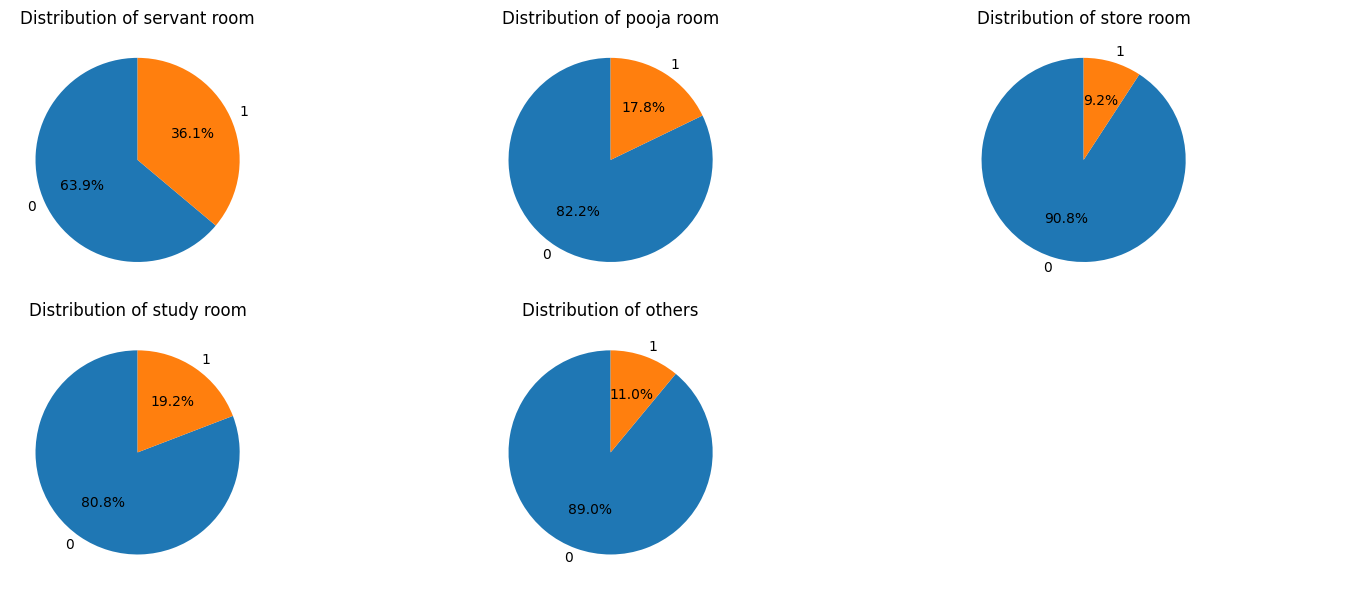

In [91]:
fig, ax = plt.subplots(2, 3, figsize=(15,6))
ax = ax.ravel()
for index, room in enumerate(["servant room", "pooja room", "store room", "study room", "others"]):
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[index])
    ax[index].set_title(f'Distribution of {room}')
    ax[index].set_ylabel('')

ax[-1].axis('off')
plt.tight_layout()
plt.show()

LUXURY SCORE COLUMN

In [93]:
df["luxury_score"].isnull().sum()

0

In [94]:
df["luxury_score"].describe()

count    3677.000000
mean       55.621431
std        41.706065
min         0.000000
25%        23.000000
50%        45.000000
75%        84.000000
max       136.000000
Name: luxury_score, dtype: float64

In [97]:
df["luxury_score"].value_counts()

luxury_score
0      481
35     418
136    215
28      99
21      83
      ... 
9        1
94       1
26       1
17       1
19       1
Name: count, Length: 116, dtype: int64

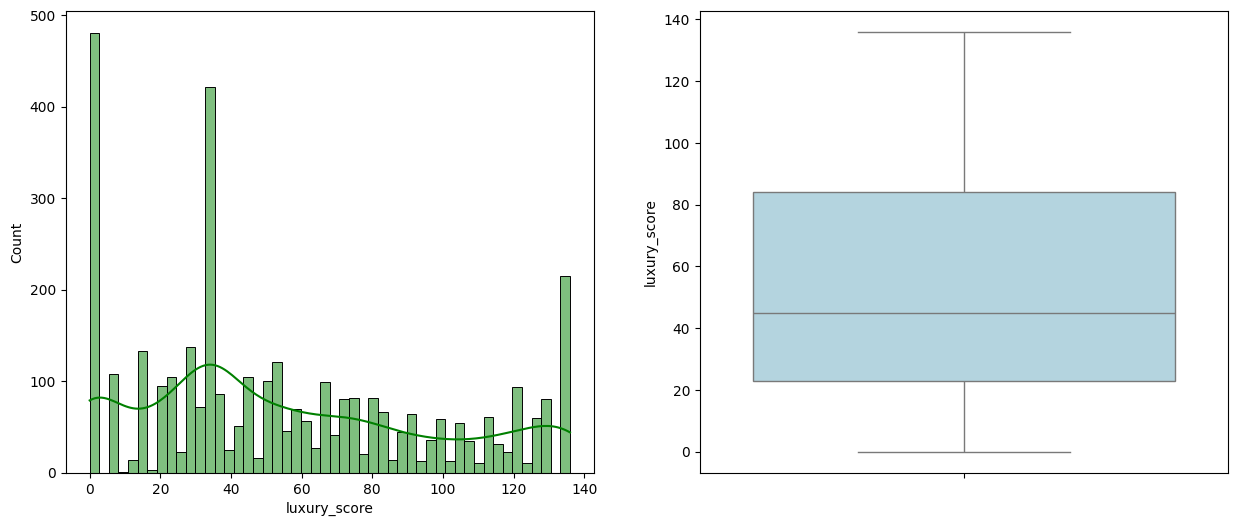

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df["luxury_score"], bins=50, kde=True, color="green", ax=ax[0])
sns.boxplot(df["luxury_score"], fill=True, color="lightblue", ax=ax[1])
fig.show()


Observations:-
1. The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 120-130 range.

2. The box plot reveals that the majority of the properties have luxury scores between approximately 20 and 85. The interquartile range (IQR) lies between these values.

In [100]:
df.shape

(3677, 23)